In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import urllib #download from football data

from __future__ import division
%matplotlib inline

### Load the data

In [3]:
testfile = urllib.URLopener()
testfile.retrieve("http://www.football-data.co.uk/mmz4281/1617/E0.csv", "./Data/England/E0_16.csv")

('./Data/England/E0_16.csv', <httplib.HTTPMessage instance at 0x7ff593fbeef0>)

In [4]:
df = pd.read_csv("./Data/England/E0_16.csv")

In [5]:
df.columns

Index([u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG', u'FTAG', u'FTR',
       u'HTHG', u'HTAG', u'HTR', u'Referee', u'HS', u'AS', u'HST', u'AST',
       u'HF', u'AF', u'HC', u'AC', u'HY', u'AY', u'HR', u'AR', u'B365H',
       u'B365D', u'B365A', u'BWH', u'BWD', u'BWA', u'IWH', u'IWD', u'IWA',
       u'LBH', u'LBD', u'LBA', u'PSH', u'PSD', u'PSA', u'WHH', u'WHD', u'WHA',
       u'VCH', u'VCD', u'VCA', u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD',
       u'BbAvD', u'BbMxA', u'BbAvA', u'BbOU', u'BbMx>2.5', u'BbAv>2.5',
       u'BbMx<2.5', u'BbAv<2.5', u'BbAH', u'BbAHh', u'BbMxAHH', u'BbAvAHH',
       u'BbMxAHA', u'BbAvAHA', u'PSCH', u'PSCD', u'PSCA'],
      dtype='object')

### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [6]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

In [7]:
res_16.head()
feature_table = df.ix[:,:23]

In [8]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
298,Chelsea,Man City,2,1,H,2,1,H,M Dean,10,...,4,7,10,14,2,9,1,3,0,0
299,Hull,Middlesbrough,4,2,H,3,2,H,M Oliver,17,...,5,4,13,12,8,4,2,1,0,0
300,Liverpool,Bournemouth,2,2,D,1,1,D,L Mason,20,...,8,2,11,8,7,2,1,1,0,0
301,Southampton,Crystal Palace,3,1,H,1,1,D,R East,25,...,9,3,16,11,11,11,2,1,0,0
302,Swansea,Tottenham,1,3,A,1,0,H,J Moss,4,...,1,8,7,8,5,7,1,1,0,0


In [9]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))

In [10]:
res_16.shape[0]

303

In [11]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print "Average number of goals at home",avg_home_scored_16
print "Average number of goals away", avg_away_scored_16
print "Average number of goals conceded at home",avg_home_conceded_16
print "Average number of goals conceded away",avg_away_conceded_16

Average number of goals at home 1.62376237624
Average number of goals away 1.19471947195
Average number of goals conceded at home 1.19471947195
Average number of goals conceded away 1.62376237624


In [12]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [13]:
# list(res_home)[0]

In [14]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,31,30,NaN,NaN,15,21,NaN,NaN
1,Bournemouth,26,18,NaN,NaN,23,33,NaN,NaN
2,Burnley,23,9,NaN,NaN,14,30,NaN,NaN
3,Chelsea,39,23,NaN,NaN,11,13,NaN,NaN
4,Crystal Palace,15,24,NaN,NaN,20,30,NaN,NaN
5,Everton,34,19,NaN,NaN,10,24,NaN,NaN
6,Hull,25,7,NaN,NaN,26,35,NaN,NaN
7,Leicester,26,11,NaN,NaN,18,29,NaN,NaN
8,Liverpool,41,25,NaN,NaN,16,23,NaN,NaN
9,Man City,24,33,NaN,NaN,14,20,NaN,NaN


In [15]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [16]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,31,30,1.260163,1.657459,15,21,0.828729,0.853659
1,Bournemouth,26,18,1.056911,0.994475,23,33,1.270718,1.341463
2,Burnley,23,9,0.934959,0.497238,14,30,0.773481,1.219512
3,Chelsea,39,23,1.585366,1.270718,11,13,0.607735,0.528455
4,Crystal Palace,15,24,0.609756,1.325967,20,30,1.104972,1.219512
5,Everton,34,19,1.382114,1.049724,10,24,0.552486,0.975610
6,Hull,25,7,1.016260,0.386740,26,35,1.436464,1.422764
7,Leicester,26,11,1.056911,0.607735,18,29,0.994475,1.178862
8,Liverpool,41,25,1.666667,1.381215,16,23,0.883978,0.934959
9,Man City,24,33,0.975610,1.823204,14,20,0.773481,0.813008


In [17]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,22,15,0.894309,0.828729,33,33,1.823204,1.341463


In [18]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [19]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Burnley,Swansea,A,3,9,0.934959,0.773481,0.828729,1.341463
1,Crystal Palace,West Brom,A,4,3,0.609756,1.104972,0.662983,0.894309
2,Everton,Tottenham,D,6,4,1.382114,0.552486,1.381215,0.569106
3,Hull,Leicester,H,5,5,1.016260,1.436464,0.607735,1.178862
4,Man City,Sunderland,H,4,3,0.975610,0.773481,0.552486,1.097561
5,Middlesbrough,Stoke,D,2,1,0.487805,0.939227,0.773481,1.138211
6,Southampton,Watford,D,6,1,0.691057,0.828729,0.662983,1.016260
7,Arsenal,Liverpool,A,5,7,1.260163,0.828729,1.381215,0.934959
8,Bournemouth,Man United,A,3,7,1.056911,1.270718,1.215470,0.528455
9,Chelsea,West Ham,H,6,3,1.585366,0.607735,1.325967,1.219512


In [20]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [21]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [22]:
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
293,Burnley,Stoke,H,3,2,0.934959,0.773481,0.773481,1.138211,1
294,Leicester,Sunderland,H,8,3,1.056911,0.994475,0.552486,1.097561,1
295,Man United,Everton,D,3,4,0.853659,0.607735,1.049724,0.975610,0
296,Watford,West Brom,H,2,2,0.975610,1.270718,0.662983,0.894309,1
297,Arsenal,West Ham,H,8,2,1.260163,0.828729,1.325967,1.219512,1
298,Chelsea,Man City,H,4,7,1.585366,0.607735,1.823204,0.813008,1
299,Hull,Middlesbrough,H,5,4,1.016260,1.436464,0.552486,0.813008,1
300,Liverpool,Bournemouth,D,8,2,1.666667,0.883978,0.994475,1.341463,0
301,Southampton,Crystal Palace,H,9,3,0.691057,0.828729,1.325967,1.219512,1
302,Swansea,Tottenham,A,1,8,0.894309,1.823204,1.381215,0.569106,-1


In [23]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [25]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [26]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.4375      0.64516129  0.5         0.43333333  0.5         0.56666667
  0.5         0.63333333  0.63333333  0.53333333]
0.538266129032


In [27]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.46875     0.51612903  0.56666667  0.53333333  0.46666667  0.66666667
  0.56666667  0.63333333  0.56666667  0.7       ]
0.568487903226


In [28]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.59375     0.67741935  0.53333333  0.63333333  0.63333333  0.7
  0.63333333  0.63333333  0.66666667  0.6       ]
0.630450268817


In [29]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.46875     0.58064516  0.63333333  0.53333333  0.53333333  0.6         0.6
  0.7         0.73333333  0.7       ]
0.608272849462


## Adding Recent Performance

In [30]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [31]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [32]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Crystal Palace','Arsenal','D',0,0,0,0,0,0],
                             ['Everton','Leicester','D',0,0,0,0,0,0],
                             ['Sunderland','Man United','D',0,0,0,0,0,0],
                             ['Bournemouth','Chelsea','D',0,0,0,0,0,0],
                             ['Man City','Hull City','D',0,0,0,0,0,0],
                             ['Middlesbrough','Burnley','D',0,0,0,0,0,0],
                             ['West Brom','Southampton','D',0,0,0,0,0,0],
                             ['Stoke','Liverpool','D',0,0,0,0,0,0],
                             ['West Ham','Swansea City','D',0,0,0,0,0,0],
                             ['Tottenham','Watford','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [33]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(313, 9)

In [34]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [35]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
312,Crystal Palace,Arsenal,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
311,Everton,Leicester,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
310,Sunderland,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
309,Bournemouth,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
308,Man City,Hull City,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307,Middlesbrough,Burnley,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
306,West Brom,Southampton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
305,Stoke,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
304,West Ham,Swansea City,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
303,Tottenham,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [207]:
# Adding k recent performance metrics. Change value of k.
k = 6
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [208]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [209]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [210]:
# num_games decides the train-test split
print feat_table.shape
num_games = feat_table.shape[0]-10
num_games

(313, 19)


303

In [211]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [212]:
### Try predictions here too.

# Adding home advantage

In [213]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [214]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print num_games
v_split = 15
n_games = num_games - v_split

303


In [215]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Burnley,Swansea,A,0.0,0.0,0.0,0.0,0.0,0.0,0.934959,0.773481,0.497238,1.219512,-1,0.0,0.0,0.0
1,Crystal Palace,West Brom,A,0.0,0.0,0.0,0.0,0.0,0.0,0.609756,1.104972,1.325967,1.219512,-1,0.0,0.0,0.0
2,Everton,Tottenham,D,0.0,0.0,0.0,0.0,0.0,0.0,1.382114,0.552486,1.049724,0.975610,0,0.0,0.0,0.0
3,Hull,Leicester,H,0.0,0.0,0.0,0.0,0.0,0.0,1.016260,1.436464,0.386740,1.422764,1,0.0,0.0,0.0
4,Man City,Sunderland,H,0.0,0.0,0.0,0.0,0.0,0.0,0.975610,0.773481,1.823204,0.813008,1,0.0,0.0,0.0


In [216]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [217]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
303,0.055556,0.194444,1.333333,1.422764,0.441989,1.381215,0.569106
304,0.861111,0.194444,2.166667,0.691057,1.491713,1.325967,1.219512
305,-0.083333,-0.250000,2.194444,0.772358,0.939227,0.773481,1.138211
306,-0.138889,-0.222222,1.750000,1.097561,0.994475,0.662983,0.894309
307,0.194444,-0.055556,2.111111,0.487805,0.939227,0.552486,0.813008
308,0.861111,0.222222,1.444444,0.975610,0.773481,1.823204,0.813008
309,0.333333,-0.055556,2.250000,1.056911,1.270718,0.994475,1.341463
310,-0.194444,-0.277778,2.722222,0.569106,1.436464,0.552486,1.097561
311,-0.250000,0.000000,1.555556,1.382114,0.552486,1.049724,0.975610
312,0.083333,-0.083333,2.055556,0.609756,1.104972,1.325967,1.219512


In [218]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [219]:
#KNN
plot_scores_knn = []
for b in xrange(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in xrange(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


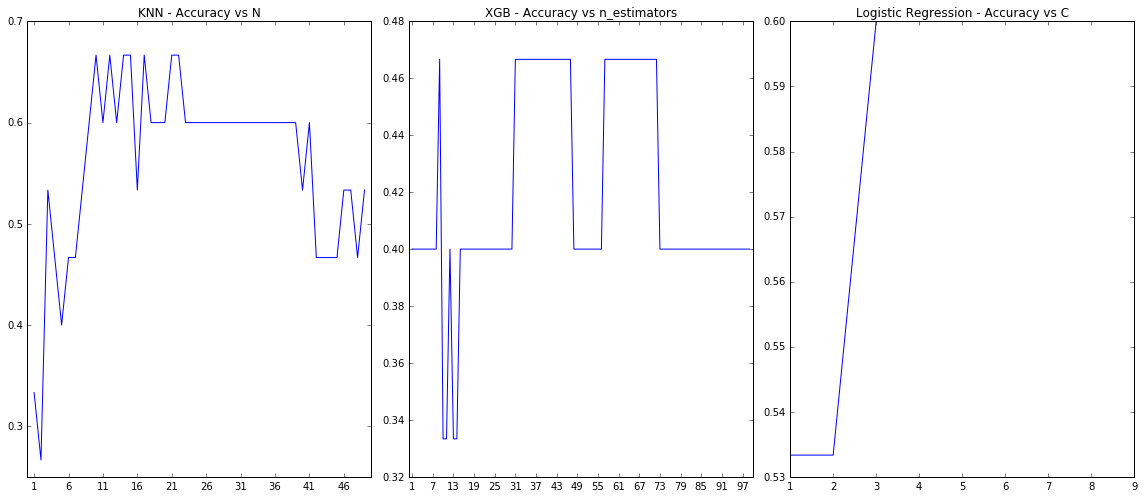

In [220]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(xrange(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(xrange(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(xrange(1,100),plot_scores_XGB);
ax2.set_xticks(xrange(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(xrange(1,10),plot_scores_logreg);
ax3.set_xticks(xrange(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [221]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e)

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print max_knn_n, max_knn_ind
print max_XGB_e, max_XGB_ind
print max_logreg_c, max_logreg_ind

#max_knn_n=25
#max_XGB_ind=16
max_logreg_ind=3



0.666666666667 9
0.466666666667 8
0.6 2


In [222]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [223]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [224]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [225]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
303,Tottenham,Watford,1,1,1
304,West Ham,Swansea City,-1,1,1
305,Stoke,Liverpool,-1,-1,-1
306,West Brom,Southampton,-1,1,1
307,Middlesbrough,Burnley,-1,-1,-1
308,Man City,Hull City,1,0,1
309,Bournemouth,Chelsea,1,1,1
310,Sunderland,Man United,-1,-1,-1
311,Everton,Leicester,1,1,1
312,Crystal Palace,Arsenal,-1,-1,-1


In [226]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [227]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [228]:
print max_knn_n, max_XGB_e, max_logreg_c
this_week

0.666666666667 0.466666666667 0.6


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
303,Tottenham,Watford,H,H,H
304,West Ham,Swansea City,A,H,H
305,Stoke,Liverpool,A,A,A
306,West Brom,Southampton,A,H,H
307,Middlesbrough,Burnley,A,A,A
308,Man City,Hull City,H,D,H
309,Bournemouth,Chelsea,H,H,H
310,Sunderland,Man United,A,A,A
311,Everton,Leicester,H,H,H
312,Crystal Palace,Arsenal,A,A,A
